In [60]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm   #this will show the progress
import tensorflow as tf
import matplotlib.pyplot as plt

In [61]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [62]:
os.chdir("D:\Education\Data Science\Files")

In [64]:
TRAIN_DIR = 'train'
TEST_DIR = 'test1'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'dogs-vs-cats-convnet'
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = image_name.split('.')[-3]
    if word_label == 'cat':
        return np.array([1,0])
    elif word_label == 'dog':
        return np.array([0,1])

In [35]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img_data), create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [37]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img_data), img_num])
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [38]:
# If dataset is not created:
train_data = create_train_data()
test_data = create_test_data()

100%|██████████| 12500/12500 [02:19<00:00, 89.50it/s] 


In [48]:
print(train_data[1])
print(test_data[1][0])

[array([[ 73,  77,  74, ...,  86,  86,  87],
       [ 72,  69,  70, ...,  83,  89,  87],
       [ 66,  69,  67, ...,  83,  84,  86],
       ...,
       [172, 175, 106, ...,  88,  88,  92],
       [162, 157, 159, ..., 118,  93, 100],
       [133, 146, 174, ..., 101,  86,  92]], dtype=uint8), array([0, 1])]
[[ 78  83  87 ...  51 206 113]
 [ 83  85  88 ...  43 210 141]
 [ 84  86  89 ...  40 215 195]
 ...
 [ 60  62  71 ...  86  83  84]
 [ 62  64  64 ...  82  86  85]
 [ 44  34  26 ...  84  84  83]]


In [43]:
train = train_data[:-500]
test = train_data[-500:]

In [49]:

# If you have already created the dataset:
# train_data = np.load('train_data.npy')
# test_data = np.load('test_data.npy')
X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = [i[1] for i in test]

In [51]:
X_train

array([[[[149],
         [149],
         [151],
         ...,
         [145],
         [145],
         [146]],

        [[149],
         [149],
         [149],
         ...,
         [144],
         [144],
         [144]],

        [[149],
         [149],
         [149],
         ...,
         [142],
         [142],
         [142]],

        ...,

        [[136],
         [124],
         [109],
         ...,
         [127],
         [128],
         [119]],

        [[134],
         [107],
         [ 98],
         ...,
         [123],
         [125],
         [114]],

        [[110],
         [104],
         [104],
         ...,
         [127],
         [120],
         [123]]],


       [[[ 73],
         [ 77],
         [ 74],
         ...,
         [ 86],
         [ 86],
         [ 87]],

        [[ 72],
         [ 69],
         [ 70],
         ...,
         [ 83],
         [ 89],
         [ 87]],

        [[ 66],
         [ 69],
         [ 67],
         ...,
         [ 83],
         [

In [50]:
#here 32 filters,5 stride(movement) and drop out is the place where prob is reached to our mentioned criteria,and this is where our model finished

In [52]:
# Building The Model

tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')


convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')


model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)
model.fit({'input': X_train}, {'targets': y_train}, n_epoch=10,
          validation_set=({'input': X_test}, {'targets': y_test}),
          snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3829  | total loss: 0.69321 | time: 48.860s
| Adam | epoch: 010 | loss: 0.69321 - acc: 0.4784 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.69320 | time: 49.978s
| Adam | epoch: 010 | loss: 0.69320 - acc: 0.4822 | val_loss: 0.69303 - val_acc: 0.5320 -- iter: 24500/24500
--


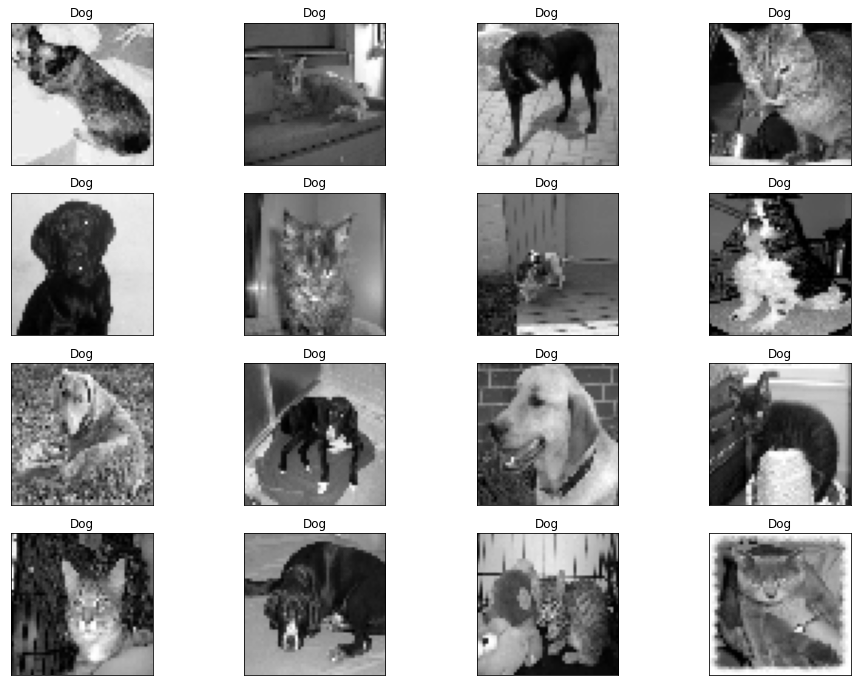

In [54]:
fig = plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data[:16]):

    img_num = data[1]
    img_data = data[0]

    y = fig.add_subplot(4, 4, num + 1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]

    if np.argmax(model_out) == 1:
        str_label = 'Dog'
    else:
        str_label = 'Cat'

    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()